<a href="https://colab.research.google.com/github/nahianabir/Machine-Learning/blob/main/Data%20Analysis%20about%20Most%20Streamed%20Spotify%20Songs%202024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting Up:**

In [2]:
!git clone https://github.com/ciol-researchlab/CIOL-Winter-ML-Bootcamp.git

Cloning into 'CIOL-Winter-ML-Bootcamp'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 87 (delta 20), reused 79 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (87/87), 3.30 MiB | 9.61 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [3]:
# Tabular Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utility
import time
import warnings
warnings.filterwarnings('ignore')

# **load dataset**

In [4]:
df= pd.read_csv("/content/CIOL-Winter-ML-Bootcamp/datasets/session1/assignment/o1/data.csv",encoding='latin-1')

In [5]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [6]:
df["Track"]

,Track
0,MILLION DOLLAR BABY
1,Not Like Us
2,i like the way you kiss me
3,Flowers
4,Houdini
...,...
4595,For the Last Time
4596,Dil Meri Na Sune
4597,Grace (feat. 42 Dugg)
4598,Nashe Si Chadh Gayi


In [7]:
df[['Album Name','Artist']]

,Album Name,Artist
0,Million Dollar Baby - Single,Tommy Richman
1,Not Like Us,Kendrick Lamar
2,I like the way you kiss me,Artemas
3,Flowers - Single,Miley Cyrus
4,Houdini,Eminem
...,...,...
4595,For the Last Time,$uicideboy$
4596,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam
4597,My Turn,Lil Baby
4598,November Top 10 Songs,Arijit Singh


# **Exploratory Data Analysis (EDA)**

In [8]:
#Check Dataset Size: The number of rows and columns in the dataset.

print(f"Dataset Size: {df.shape}")  # Rows and Columns

Dataset Size: (4600, 29)


In [9]:
# Check Column Types: Information about columns and their data types.


df.dtypes

,0
Track,object
Album Name,object
Artist,object
Release Date,object
ISRC,object
All Time Rank,object
Track Score,float64
Spotify Streams,object
Spotify Playlist Count,object
Spotify Playlist Reach,object


In [10]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
Apple Music Playlist Count,4039.000000,54.603120,71.612270,1.000000,10.000000,28.000000,70.000000,859.000000
Deezer Playlist Count,3679.000000,32.310954,54.274538,1.000000,5.000000,15.000000,37.000000,632.000000
Track Score,4600.000000,41.844043,38.543766,19.400000,23.300000,29.900000,44.425000,725.400000
Amazon Playlist Count,3545.000000,25.348942,25.989826,1.000000,8.000000,17.000000,34.000000,210.000000
Spotify Popularity,3796.000000,63.501581,16.186438,1.000000,61.000000,67.000000,73.000000,96.000000
TIDAL Popularity,0.000000,nan,nan,nan,nan,nan,nan,nan


**Insight:**

this graph shows the statistical summary of streaming platform dataset. Like, Apple Music Playlist has more count than any other streaming services etc.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [12]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Track Score', 'Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'TIDAL Popularity', 'Explicit Track']


In [13]:
# Display summary statistics for numerical columns
print(df[numerical_columns].describe())

       Track Score  Spotify Popularity  Apple Music Playlist Count  \
count  4600.000000         3796.000000                  4039.00000   
mean     41.844043           63.501581                    54.60312   
std      38.543766           16.186438                    71.61227   
min      19.400000            1.000000                     1.00000   
25%      23.300000           61.000000                    10.00000   
50%      29.900000           67.000000                    28.00000   
75%      44.425000           73.000000                    70.00000   
max     725.400000           96.000000                   859.00000   

       Deezer Playlist Count  Amazon Playlist Count  TIDAL Popularity  \
count            3679.000000            3545.000000               0.0   
mean               32.310954              25.348942               NaN   
std                54.274538              25.989826               NaN   
min                 1.000000               1.000000               NaN   
25% 

# **Handeling missing values :**

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

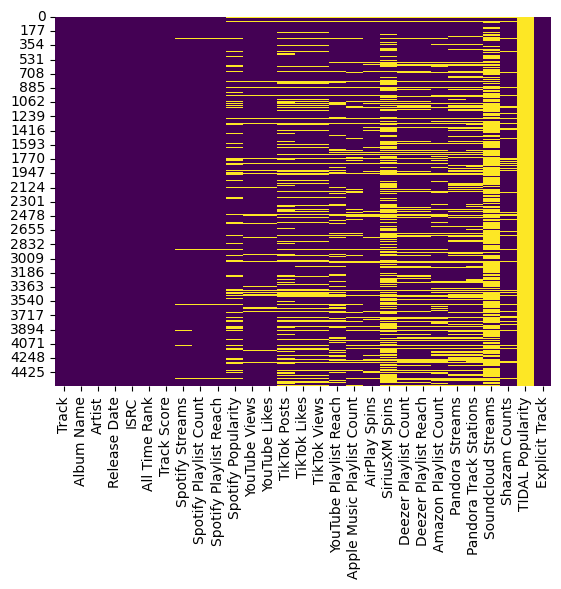

In [14]:
# Check for missing values in each column
print(df.isnull().sum())

# Check for missing values as a percentage of the total
print(df.isnull().mean() * 100)

# Visualize missing values using a heatmap (requires seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [15]:
# Remove rows with missing values:

df_cleaned = df.dropna()
df_cleaned.shape

(0, 29)

In [16]:
# Remove columns with missing values:

df_cleaned = df.dropna(axis=1)
df_cleaned.shape

(4600, 7)

In [17]:
# Verify the changes
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity       

In [18]:
print("\nShape of the DataFrame after handling missing values:", df.shape)


Shape of the DataFrame after handling missing values: (4600, 29)


# **Detecting Outliers:**

In [19]:
df['Track Score']

,Track Score
0,725.4
1,545.9
2,538.4
3,444.9
4,423.3
...,...
4595,19.4
4596,19.4
4597,19.4
4598,19.4


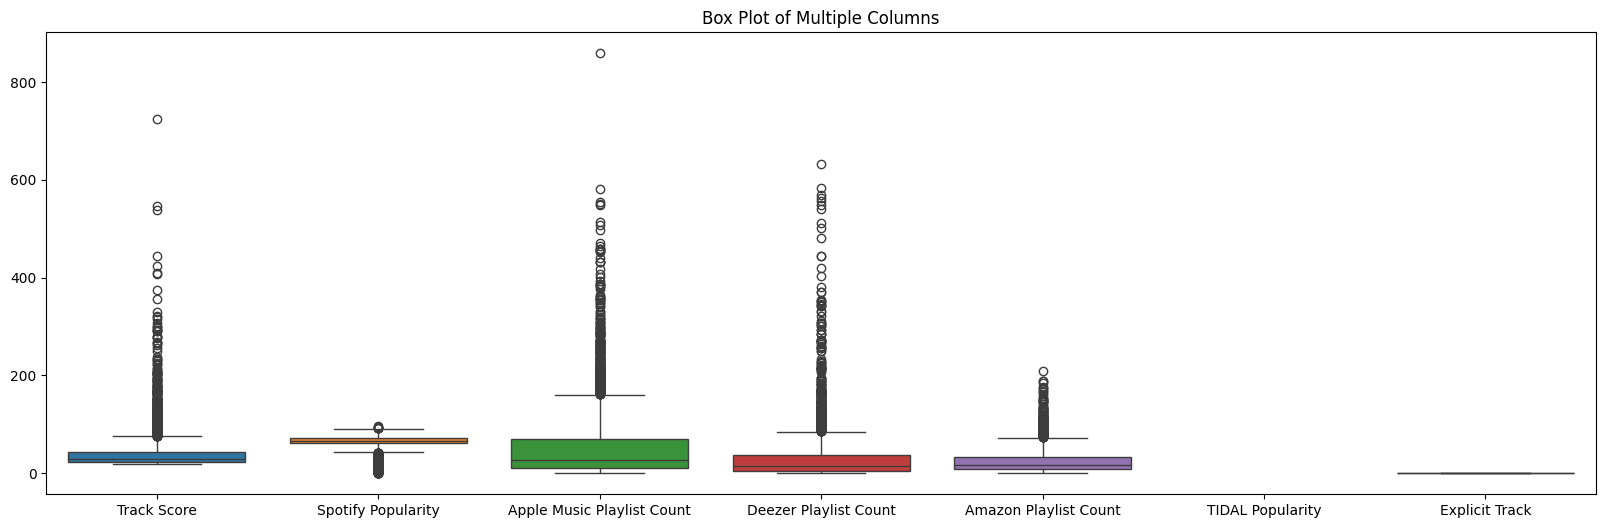

In [20]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot of Multiple Columns')
plt.show()

**Insight:**

this box plot shows about outliers about the dataset.outliers are typically represented as individual points beyond the whiskers. so we can see track score has some of outliers there. and Apple music playlist and Deezer Playlist has more ouliers than others.

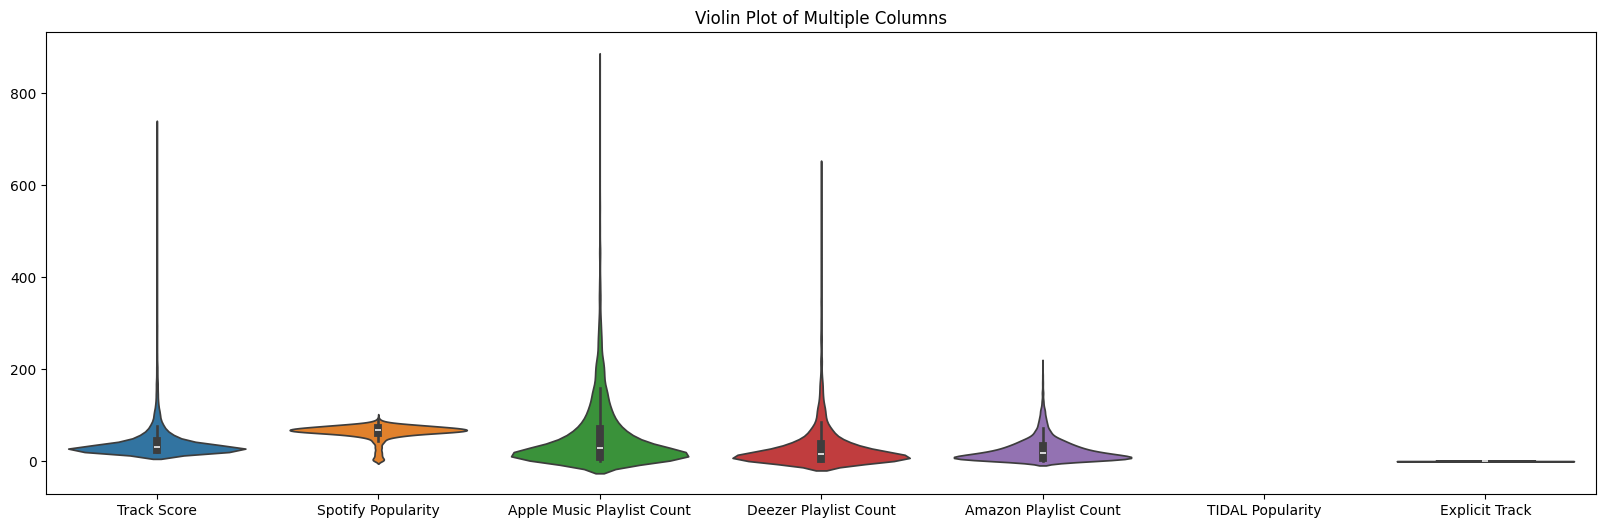

In [21]:
# Violin plot for multiple columns
plt.figure(figsize=(20, 6))
sns.violinplot(data=df[numerical_columns])
plt.title('Violin Plot of Multiple Columns')
plt.show()

**Insight:**

same as box plot. just more visiable and readbale than boxplot.

# **Fixing Outliers:**

**Track Score :**

In [22]:
# IQR Method (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Track Score'].quantile(0.25)
Q3 = df['Track Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Track Score'] < lower_bound) | (df['Track Score'] > upper_bound)]
outliers['Track Score']

,Track Score
0,725.4
1,545.9
2,538.4
3,444.9
4,423.3
...,...
401,76.3
402,76.2
403,76.2
404,76.2


In [23]:
# Remove rows with outliers
df_cleaned = df[(df['Track Score'] >= lower_bound) & (df['Track Score'] <= upper_bound)]
df_cleaned.shape

(4194, 29)

**Spotify Popularity:**

In [24]:
# IQR Method (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Spotify Popularity'].quantile(0.25)
Q3 = df['Spotify Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Spotify Popularity'] < lower_bound) | (df['Spotify Popularity'] > upper_bound)]
outliers['Spotify Popularity']

,Spotify Popularity
0,92.0
1,92.0
2,92.0
7,92.0
12,92.0
...,...
4563,34.0
4568,25.0
4570,20.0
4578,1.0


In [25]:
# Remove rows with outliers
df_cleaned = df[(df['Spotify Popularity'] >= lower_bound) & (df['Spotify Popularity'] <= upper_bound)]
df_cleaned.shape

(3460, 29)

**Apple Music Playlist Count :**

In [26]:
# IQR Method (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Apple Music Playlist Count'].quantile(0.25)
Q3 = df['Apple Music Playlist Count'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Apple Music Playlist Count'] < lower_bound) | (df['Apple Music Playlist Count'] > upper_bound)]
outliers['Apple Music Playlist Count']

,Apple Music Playlist Count
0,210.0
1,188.0
2,190.0
3,394.0
4,182.0
...,...
4250,194.0
4256,180.0
4305,204.0
4309,213.0


In [27]:
# Remove rows with outliers
df_cleaned = df[(df['Apple Music Playlist Count'] >= lower_bound) & (df['Apple Music Playlist Count'] <= upper_bound)]
df_cleaned.shape

(3729, 29)

**Deezer Playlist Count :**

In [28]:
# IQR Method (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Deezer Playlist Count'].quantile(0.25)
Q3 = df['Deezer Playlist Count'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Deezer Playlist Count'] < lower_bound) | (df['Deezer Playlist Count'] > upper_bound)]
outliers['Deezer Playlist Count']

,Deezer Playlist Count
2,136.0
3,264.0
5,86.0
6,168.0
7,87.0
...,...
4309,260.0
4318,217.0
4337,106.0
4390,107.0


In [29]:
# Remove rows with outliers
df_cleaned = df[(df['Deezer Playlist Count'] >= lower_bound) & (df['Deezer Playlist Count'] <= upper_bound)]
df_cleaned.shape

(3372, 29)

**Amazon Playlist Count :**

In [30]:
# IQR Method (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Amazon Playlist Count'].quantile(0.25)
Q3 = df['Amazon Playlist Count'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Amazon Playlist Count'] < lower_bound) | (df['Amazon Playlist Count'] > upper_bound)]
outliers['Amazon Playlist Count']

,Amazon Playlist Count
0,114.0
1,111.0
2,172.0
3,210.0
4,105.0
...,...
4065,110.0
4250,77.0
4309,76.0
4318,79.0


In [31]:
# Remove rows with outliers
df_cleaned = df[(df['Amazon Playlist Count'] >= lower_bound) & (df['Amazon Playlist Count'] <= upper_bound)]
df_cleaned.shape

(3336, 29)

**TIDAL Popularity :**

In [32]:
# IQR Method (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['TIDAL Popularity'].quantile(0.25)
Q3 = df['TIDAL Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['TIDAL Popularity'] < lower_bound) | (df['TIDAL Popularity'] > upper_bound)]
outliers['TIDAL Popularity']

,TIDAL Popularity


In [33]:
# Remove rows with outliers
df_cleaned = df[(df['TIDAL Popularity'] >= lower_bound) & (df['TIDAL Popularity'] <= upper_bound)]
df_cleaned.shape

(0, 29)

**Explicit Track :**

In [34]:
# IQR Method (Interquartile Range)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Explicit Track'].quantile(0.25)
Q3 = df['Explicit Track'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Explicit Track'] < lower_bound) | (df['Explicit Track'] > upper_bound)]
outliers['Explicit Track']

,Explicit Track


In [35]:
# Remove rows with outliers
df_cleaned = df[(df['Explicit Track'] >= lower_bound) & (df['Explicit Track'] <= upper_bound)]
df_cleaned.shape

(4600, 29)

# **Univariate Analysis**

**Track Score:**

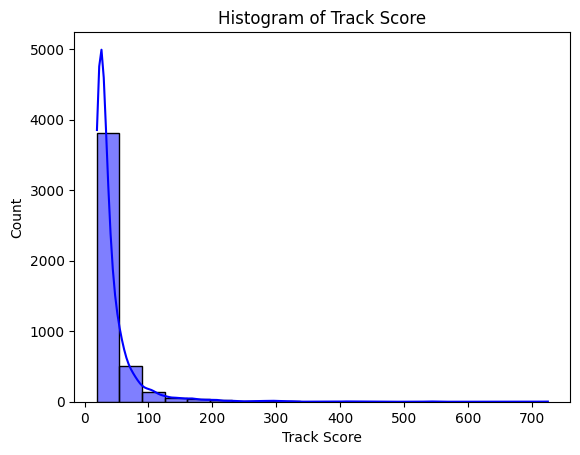

In [37]:
# Plot histogram for individual numerical columns
sns.histplot(df['Track Score'], kde=True, bins=20, color="blue")
plt.title(f'Histogram of Track Score')
plt.show()

**Spotify Popularity :**

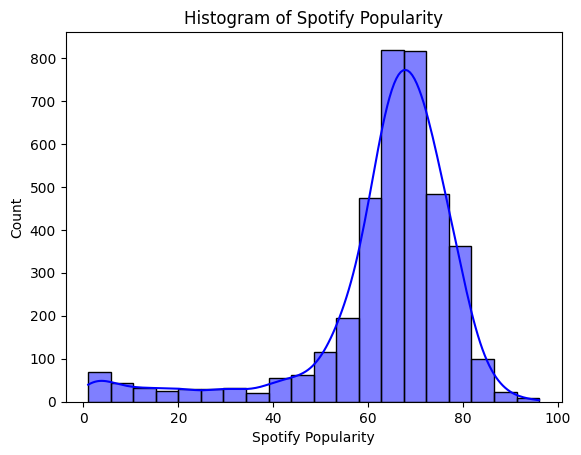

In [38]:
# Plot histogram for individual numerical columns
sns.histplot(df['Spotify Popularity'], kde=True, bins=20, color="blue")
plt.title(f'Histogram of Spotify Popularity')
plt.show()

**Apple Music Playlist Count:**

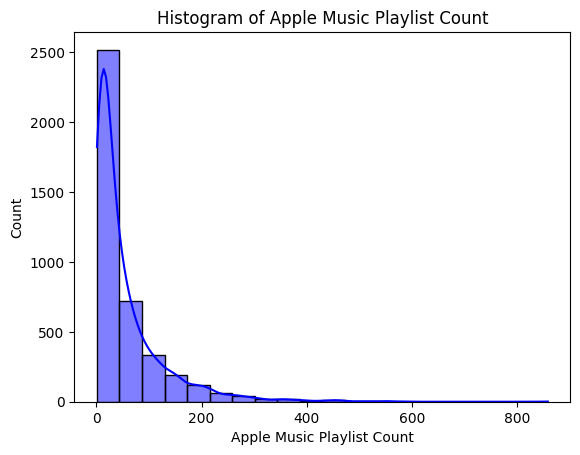

In [39]:
# Plot histogram for individual numerical columns
sns.histplot(df['Apple Music Playlist Count'], kde=True, bins=20, color="blue")
plt.title(f'Histogram of Apple Music Playlist Count')
plt.show()

**Deezer Playlist Count**

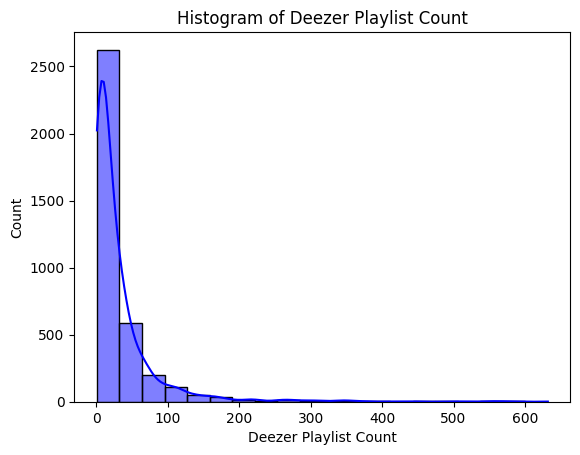

In [40]:
# Plot histogram for individual numerical columns
sns.histplot(df['Deezer Playlist Count'], kde=True, bins=20, color="blue")
plt.title(f'Histogram of Deezer Playlist Count')
plt.show()

**Amazon Playlist Count:**

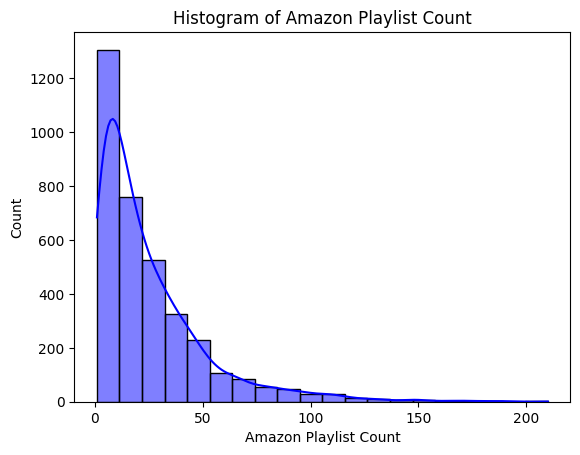

In [41]:
# Plot histogram for individual numerical columns
sns.histplot(df['Amazon Playlist Count'], kde=True, bins=20, color="blue")
plt.title(f'Histogram of Amazon Playlist Count')
plt.show()

**TIDAL Popularity:**

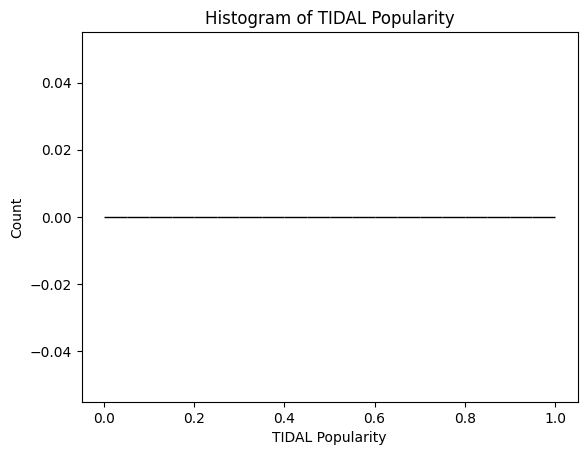

In [42]:
# Plot histogram for individual numerical columns
sns.histplot(df['TIDAL Popularity'], kde=True, bins=20, color="blue")
plt.title(f'Histogram of TIDAL Popularity')
plt.show()

**Explicit Track:**

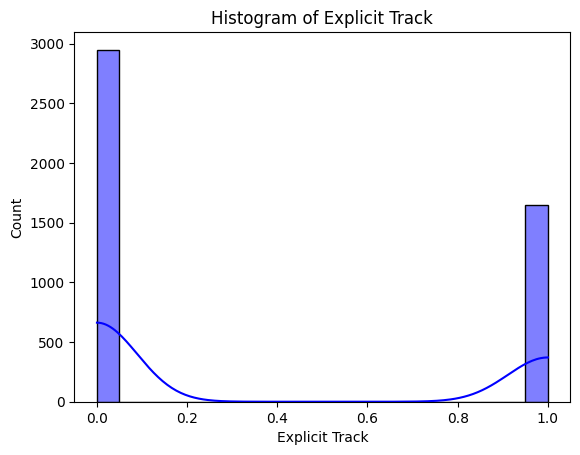

In [43]:
# Plot histogram for individual numerical columns
sns.histplot(df['Explicit Track'], kde=True, bins=20, color="blue")
plt.title(f'Histogram of Explicit Track')
plt.show()

**All together:**

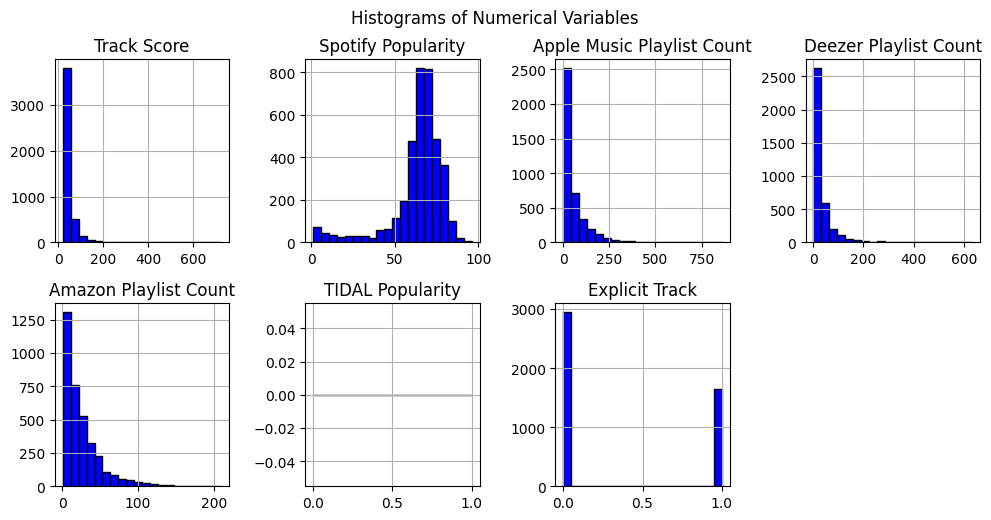

In [44]:
# Plot multiple histograms together
df[numerical_columns].hist(bins=20, figsize=(10, 10), layout=(4,4), color="blue", edgecolor="black")
plt.suptitle('Histograms of Numerical Variables')
plt.tight_layout()
plt.show()

**Insight:**

about Track Score:The histogram appears to be right skewed, means there are more tracks with lower scores and fewer with very high scores.

about Spotify Popularity: Same as track score,right skewed. means that most tracks have moderate popularity on Spotify.

Apple music count: highly right skewed, with a long tail towards higher playlist counts.

Deezer playlist count: similer to apple music.

Amazon playlist count: also right skewed, but less pronounced than Apple Music and Deezer.

Tidal popularity: zero.

Explicit track: This histogram is bimodal, showing two distinct peaks in the distribution.


In [45]:
from scipy import stats

def normality_test(df, column, alpha=0.05):
    data = df[column]
    # Perform the Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(data)

    # Check if p-value is less than alpha (significance level)
    if p_value > alpha:
        return f"Data of {column} column is normally distributed (p-value = {p_value:.4f})"
    else:
        return f"Data of {column} column is NOT normally distributed (p-value = {p_value:.4f})"

In [46]:
normality_test(df, numerical_columns[0])

'Data of Track Score column is NOT normally distributed (p-value = 0.0000)'

**Categorical Variables:**

In [47]:
#show the category columns

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']


In [48]:
few_category_columns=['Track', 'Album Name', 'Artist', 'All Time Rank','Spotify Streams']

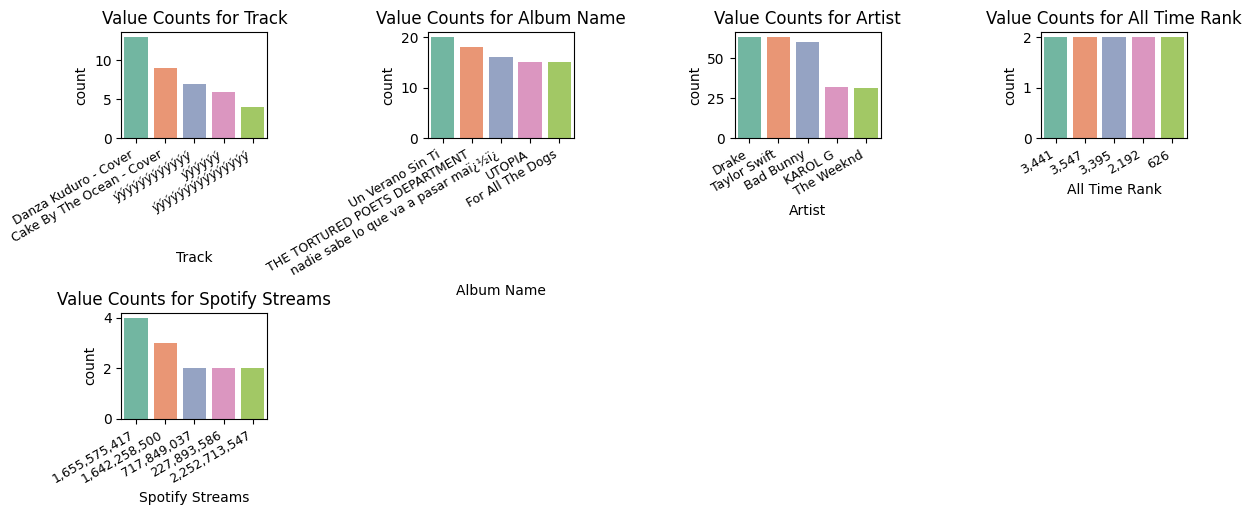

In [49]:
# Set up the plotting area (adjust size as needed)
plt.figure(figsize=(12, 10))

# Plot each categorical column's value counts
for i, col in enumerate(few_category_columns):
    plt.subplot(4, 4, i+1)  # Adjust grid size (3x3 here)
    top_values = df[col].value_counts().head(5).index
    sns.countplot(x=col, data=df, palette='Set2',order=top_values)
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=30, fontsize=9, ha='right')

# Tight layout for better spacing
plt.tight_layout()
plt.show()

**Insight:**

the track chart shows that these tracks appear multiple times in the dataset.

the album chart shows that these albums have multiple tracks in the dataset.

the artist chart shows that these artists have a high number of tracks or albums in the dataset.



# **Bivariate and Multivariate Analysis**

**Scatter Plot:**

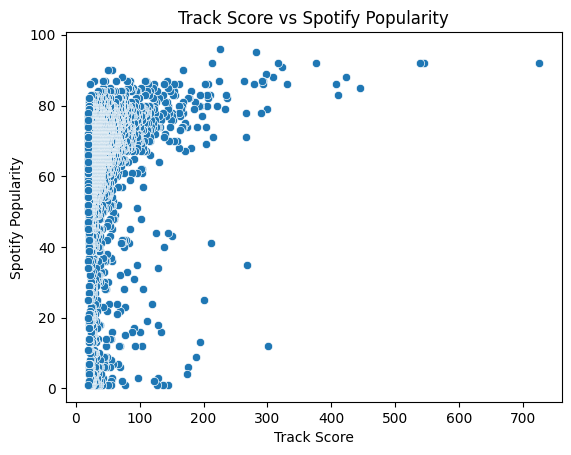

In [50]:
# Plot scatter plot for two variables
sns.scatterplot(x='Track Score', y='Spotify Popularity', data=df)
plt.title('Track Score vs Spotify Popularity')
plt.xlabel('Track Score')
plt.ylabel('Spotify Popularity')
plt.show()

**Insight:**

 this plot shows that, tracks with higher scores tend to have higher popularity on Spotify. However, the correlation is not very strong, as there is some amount of scatter in the data.

**Pair Plot:**

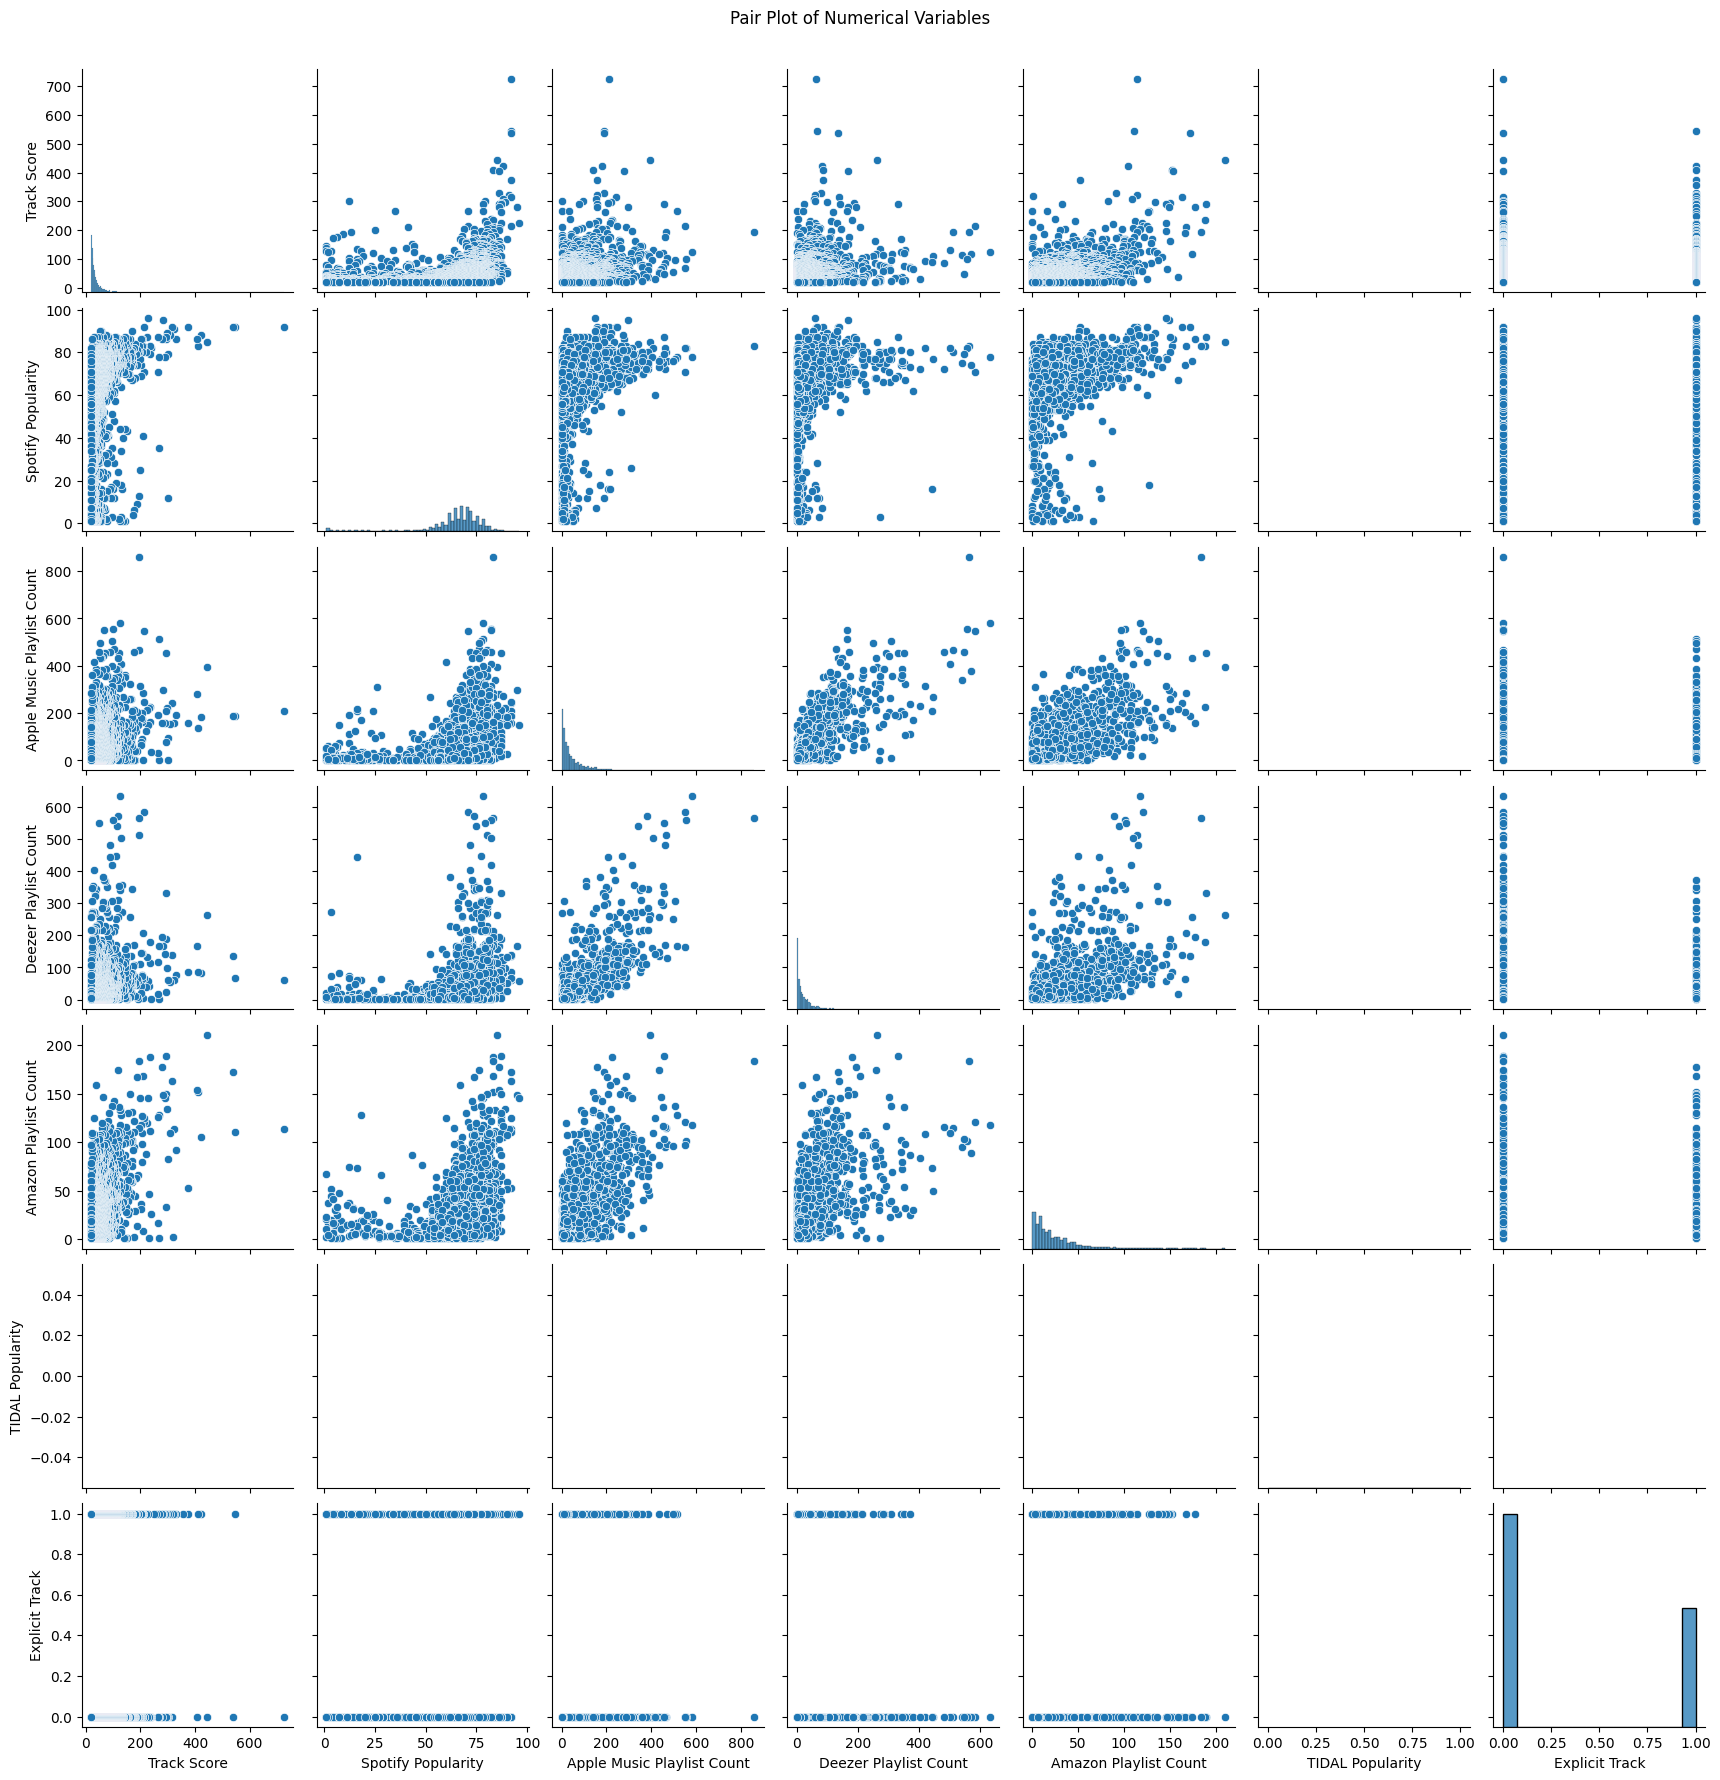

In [51]:
# Plot pair plot for numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

**Insight:**

This pair plot visualizes the relationships between all pairs of numerical variables in this dataset.

**Correlation Matrix:**

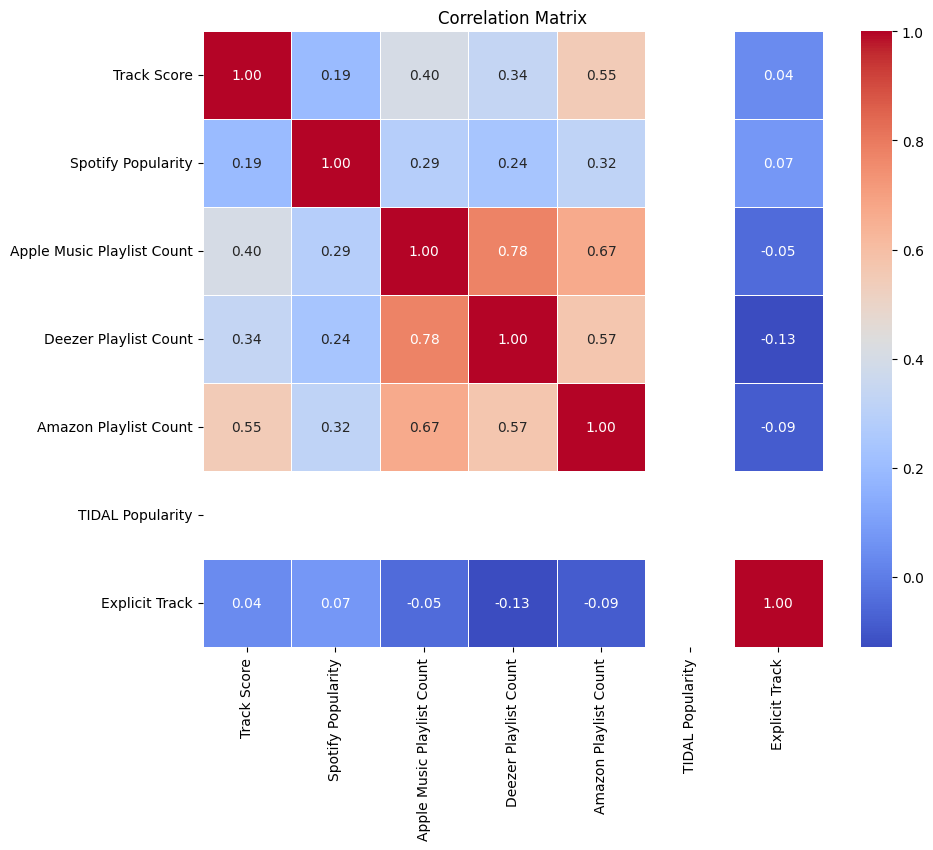

In [52]:
# Calculate the correlation matrix
corr_matrix =df[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Insight:

This correlation matrix shows a summary of the relationships between different variables in this dataset. It helps to identify which variables are strongly correlated and which are not. like- The correlation coefficient between Track Score and Spotify Popularity is 0.19. This indicates a weak positive correlation. But in general higher scoring tracks tend to have slightly higher popularity on Spotify, but the relationship is not very strong.

**Cross Tabulation and Stacked Bar Chart:**

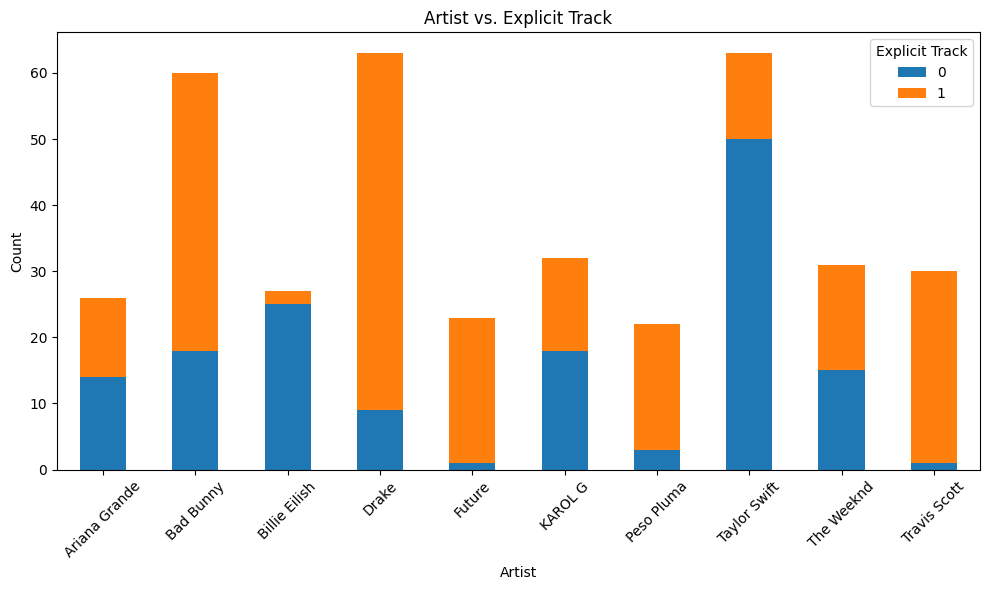

In [53]:
# Filter to include only the top 10 most frequent artists
top_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

# cross-tabulation for the filtered data
cross_tab = pd.crosstab(filtered_df['Artist'], filtered_df['Explicit Track'])

# Ploting the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Artist vs. Explicit Track')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Explicit Track')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


**Insights:**

for Taylor Swift And Drake ,this two artists have the highest number of tracks in the dataset.For Taylor Swift, the majority of her tracks are not explicit.For Drake, most tracks are explicit.

# **Data Visualization**

**Artist and their Track Popularity :**

In [54]:
import plotly.express as px
fig = px.scatter(df, x='Artist', y='Track', color='Spotify Popularity', title='Artist and their Track Popularity')
fig.show()

**Insights:**
this scatter plot shows about Artist and their Track popularity on Spotify.
Warm color means more popular,cool color means less populer.

**Track and their YouTube Views:**

In [55]:
fig = px.scatter(df, x='Track', y='YouTube Views', title='Track and their YouTube Views')
fig.show()

**Insights**:

This scatter plot shows the youtube views of the track. From the lowest 84,274,75 (Million Dollar Baby) to the highest 866,300,755( Me Acostumbre)

# **Identifying Patterns and Trends:**

**Avereage Spotify Popularity by Artist:**

In [56]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    fig = px.line(df.groupby('Date')['Spotify Popularity'].mean().reset_index(), x='Date', y='Spotify Popularity', title='Average Spotify Popularity Over Time')
    fig.show()

In [57]:
# trends in Spotify Popularity across different artists
artist_popularity = df.groupby('Artist')['Spotify Popularity'].mean().sort_values(ascending=False)
fig = px.bar(artist_popularity, x=artist_popularity.index, y='Spotify Popularity', title='Average Spotify Popularity by Artist')
fig.show()

**Insight:**

this plot shows the average spotify popularity by artits.The artists with the longest bars have the highest average Spotify popularity. We can identify these artists by looking for the bars that extend furthest to the right.

**Correlation between Playlist Count:**

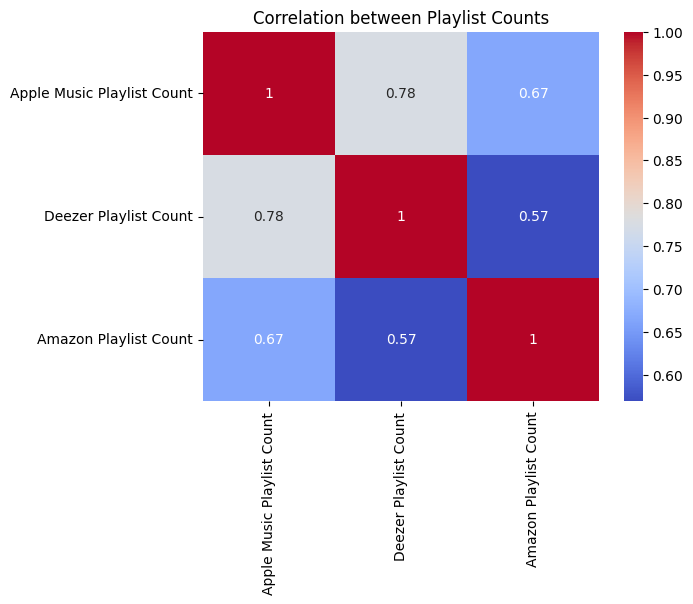

In [58]:
# playlist counts across different platforms
playlist_counts = df[['Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']]
sns.heatmap(playlist_counts.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Playlist Counts')
plt.show()

**Insight:**

This heatmap shows the correlation between playlist counts across different platforms-

Apple Music and Deezer have a strong positive correlation (0.78)

Apple Music and Amazon also have a moderate positive correlation (0.67)

Deezer and Amazon have the weakest correlation among the three (0.57)

# **Hypothesis Testing:**

## **Hypothesis 1: Tracks with higher Spotify Popularity have higher Track Scores.**


**H0:** There is no correlation between Spotify Popularity and Track Score.

**H1:** There is a positive correlation between Spotify Popularity and Track Score.

In [59]:
# Replacing infinite values with Nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Removing rows with missing values in the relevant columns
df_cleaned = df.dropna(subset=['Spotify Popularity', 'Track Score'])

# calculating correlation
correlation_coefficient, p_value = stats.pearsonr(df_cleaned['Spotify Popularity'], df_cleaned['Track Score'])
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
  print("Insight: Reject the H0 hypothesis.There is statistically significant evidence of a correlation.")
else:
  print("Insight: Fail to reject the H0 hypothesis.There is no statistically significant evidence of a correlation.")

Correlation Coefficient: 0.19
P-value: 0.000
Insight: Reject the H0 hypothesis.There is statistically significant evidence of a correlation.


## **Hypothesis 2:  The average Track Score for explicit tracks is different from non-explicit tracks**

**H0:** The mean Track Score for explicit tracks is equal to the mean Track Score for non-explicit tracks.

**H1:** The mean Track Score for explicit tracks is not equal to the mean Track Score for non-explicit tracks.

In [60]:
explicit_tracks = df[df['Explicit Track'] == 1]['Track Score']
non_explicit_tracks = df[df['Explicit Track'] == 0]['Track Score']

t_statistic, p_value = stats.ttest_ind(explicit_tracks, non_explicit_tracks)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Insight: Reject the H0 hypothesis.There is a statistically significant difference in mean Track Score between explicit and non-explicit tracks.")
else:
    print("Insight: Fail to reject the H0 hypothesis.There is no statistically significant difference in mean Track Score between explicit and non-explicit tracks.")

T-statistic: 2.84
P-value: 0.005
Insight: Reject the H0 hypothesis.There is a statistically significant difference in mean Track Score between explicit and non-explicit tracks.


## Chi-squared test of independence between Artist and Spotify Popularity:

### **Hypothesis 3: There's a relationship between Artist and Spotify Popularity.**

**H0:** There is no association between Artist and Spotify Popularity.

**H1:** There is an association between Artist and Spotify Popularity.

In [61]:
#catagorizing the Spotify Popularity
df['Popularity_Category'] = pd.cut(df['Spotify Popularity'], bins=3, labels=['Low','Medium','High'])

contingency_table = pd.crosstab(df['Artist'], df['Popularity_Category'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")
if p < 0.05:
    print("Insight: Reject the H0 hypothesis.There is a statistically significant association between Artist and Spotify Popularity category.")
else:
    print("Insight: Fail to reject the H0 hypothesis.There is no statistically significant association between Artist and Spotify Popularity category.")

Chi-squared statistic: 5065.64
P-value: 0.000
Insight: Reject the H0 hypothesis.There is a statistically significant association between Artist and Spotify Popularity category.
